# 6.4 Machine Learning 

1 Importing Data and Libraries
2 Clean Data
3 Explore Data and Decide Variables to Test
4 Reshape the Variables
5 Split Data into a Training Set and a Test Set
6 Run a Linear Regression
7 Check Model Summary Stats
8 Compare Predicted Versus Actual
9 Compare Test Set

# 1 Importing Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ensure graphs are displayed
%matplotlib inline

In [3]:
# import data 
df = pd.read_csv(r'C:\Users\419182\OneDrive - JELDWEN Inc\Desktop\Data Analytics\Clean2019BattingData2.csv', low_memory = False)

# 2 Clean Data

I initially cleaned this data set, but I will make sure that the columns I need do not contain missing values. 

In [4]:
# check for missing values
df[['Opponent.H', 'Wind.Speed']].isnull().sum()

Opponent.H    0
Wind.Speed    0
dtype: int64

# 3 Explore Data and Decide on Variables to test

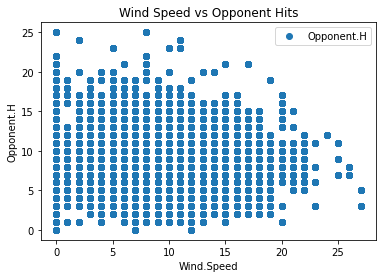

In [5]:
# create a scatter plot to see variables 
df.plot(x = 'Wind.Speed', y='Opponent.H',style='o')
plt.title('Wind Speed vs Opponent Hits')  
plt.xlabel('Wind.Speed')  
plt.ylabel('Opponent.H')  
plt.show()

My original hypothesis from task 6.2 was that wind speeds greater than 10 have higher opponent hits.  Passed on the graph above, this does not seem to hold true.  I will use these two as my variables regardless. 

C:\Users\419182\Newanaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wind.Speed', ylabel='Density'>

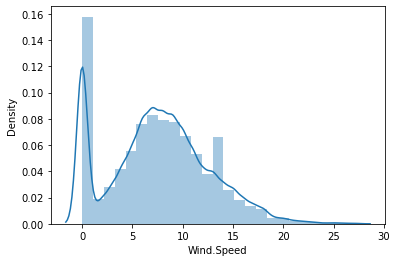

In [6]:
# create histogram
sns.distplot(df['Wind.Speed'], bins=25)

In [7]:
# check mean, median, max
df['Wind.Speed'].mean()

7.544450800915332

In [8]:
df['Wind.Speed'].median()

8.0

In [9]:
df['Wind.Speed'].max()

27

# 4 Reshape the variables

In [10]:
# use numpy arrays to reshape 
X = df['Wind.Speed'].values.reshape(-1,1)
y = df['Opponent.H'].values.reshape(-1,1)

In [11]:
# check arrays
X

array([[0],
       [0],
       [0],
       ...,
       [4],
       [4],
       [4]], dtype=int64)

In [12]:
# check array
y

array([[ 7],
       [ 7],
       [ 7],
       ...,
       [14],
       [14],
       [14]], dtype=int64)

# 5 Split Data into a training set and test set

In [13]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 6 Run a Linear Regression 

In [14]:
# create regresion object
regression = LinearRegression()

In [15]:
# fit regression object into training set
regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# predict the values of y using X
y_predicted = regression.predict(X_test)

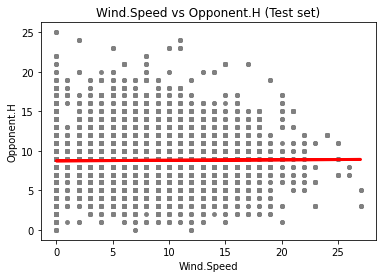

In [17]:
# create a plot that shows the regression line from the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Wind.Speed vs Opponent.H (Test set)')
plot_test.xlabel('Wind.Speed')
plot_test.ylabel('Opponent.H')
plot_test.show()

It is hard to say if the line fits the data well without knowing the R2 and MSE.  Based on the data being spread out, I am thinking that the regression may not fit the data. 

# 7 Check Model Summary Stats

In [18]:
# create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [19]:
# print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00640872]]
Mean squared error:  12.23914715243127
R2 score:  -0.00010246823754678225


# 8 Compare Predicted versus Actual 

In [20]:
# check
y_predicted

array([[8.77897975],
       [8.81743207],
       [8.75975359],
       ...,
       [8.79820591],
       [8.83665823],
       [8.79820591]])

In [21]:
# create a df comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8,8.778980
1,6,8.817432
2,9,8.759754
3,5,8.740527
4,14,8.798206
5,11,8.823841
6,12,8.817432
7,12,8.778980
8,9,8.791797
9,8,8.740527


# 9 Compare Test Set

In [22]:
# predict
y_predicted_train = regression.predict(X_train)

In [23]:
# create objects
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [24]:
# print model summary statistics 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00640872]]
Mean squared error:  12.351371085040457
R2 score:  8.461820083260907e-05


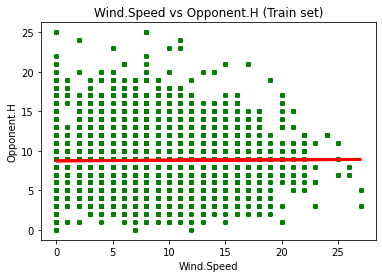

In [25]:
# visualize training set results 
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Wind.Speed vs Opponent.H (Train set)')
plot_test.xlabel('Wind.Speed')
plot_test.ylabel('Opponent.H')
plot_test.show()

I think this is not the best model for the data as the MSE is large in comparison to the variations in data.  The data range is relatively small, meaning an MSE of 12 would be considered large.  The R2 is also very large and indicating that this regression line won't be able to predict anything. Based on the R2 scores, I am overfitted.  This means the model is too specific for the data. One issue with the data could be within the distribution.  I noted that wind speeds over 10 would create more opponent hits, but there are far more data points from 0-10 than 10-27. Smoothing this could result in a distortion or relaity or bias.  

In [26]:
df.to_csv(r'C:\Users\419182\OneDrive - JELDWEN Inc\Desktop\Data Analytics\Clean2019BattingData3.csv', index = False)